In [3]:
import h5py
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import math
import pyrtools as pt
from scipy.signal import fftconvolve
from math import pi
from tqdm import tqdm

(54354, 30, 40)


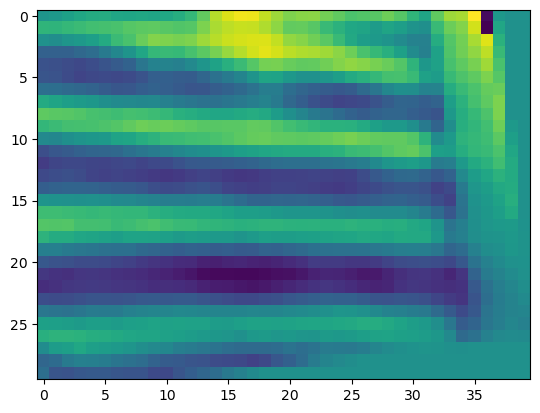

In [4]:
# load data
f = h5py.File('data/ModelData_070921_J553RT_fm1_dt050_rawWorldCam_4ds.h5', 'r')

# we're going to get the video frames that have been rotated
frames = f['model_vid_sm_shift'] # Note: the frames seem to range pixel values from -2 to 2.  This is fairly non-standard
frames = (255*(frames[:]/4 + .5)).astype('uint8') # setting image range to [0,1],  from [-2,2]

print(frames.shape)
plt.imshow(frames[1,:,:])

In [29]:
flow_magnitude = []
flow_angle = []

for ii in tqdm(range(frames.shape[0]-1)):
# for ii in tqdm(range(1000)):
#     flow = cv2.calcOpticalFlowFarneback(frames[ii,:,:], frames[ii+1,:,:],  
#                                            None, 
#                                            0.5, 3, 15, 3, 5, 1.2, 0) 

    optical_flow = cv2.optflow.createOptFlow_DualTVL1()
    flow = optical_flow.calc(frames[ii,:,:], frames[ii+1,:,:], None)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    flow_magnitude.append(magnitude)
    flow_angle.append(angle)
    
flow_magnitude = np.stack(flow_magnitude)
flow_angle = np.stack(flow_angle)


100%|█████████████████████████████████████| 54353/54353 [16:38<00:00, 54.46it/s]


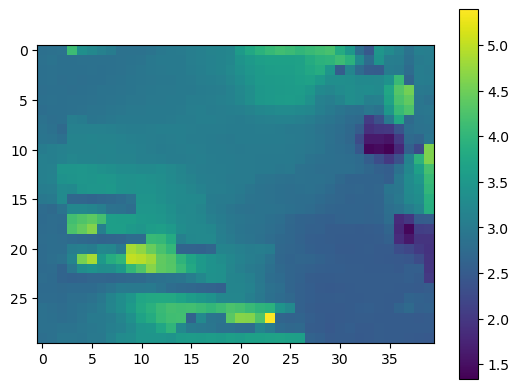

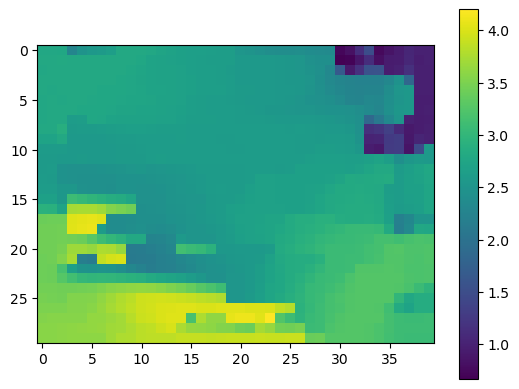

In [30]:
flow_magnitude.shape

plt.imshow(flow_magnitude[0,:,:])
plt.colorbar()
plt.show()
plt.imshow(flow_angle[0,:,:])
plt.colorbar()
plt.show()

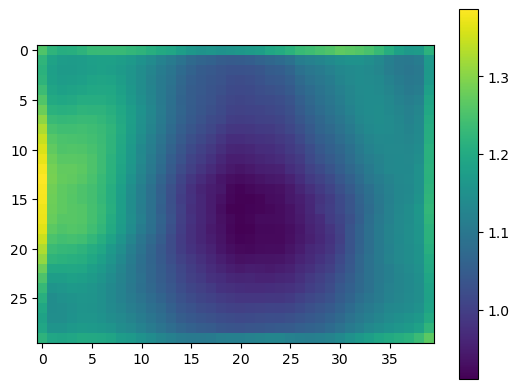

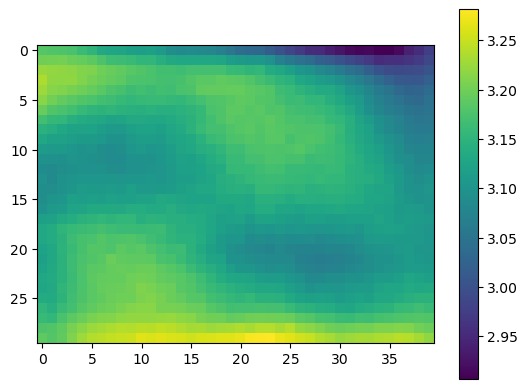

In [31]:
plt.imshow(flow_magnitude.mean(axis=0))
plt.colorbar()
plt.show()
plt.imshow(flow_angle.mean(axis=0))
plt.colorbar()
plt.show()

In [34]:
np.save('opticflow_magnitude.npy',flow_magnitude);
np.save('opticflow_angle.npy',flow_angle)

In [32]:
# Matlab Nicole Rust energy model.

In [33]:
f.keys()

<KeysViewHDF5 ['model_active', 'model_eyerad', 'model_gz', 'model_nsp', 'model_phi', 'model_pitch', 'model_roll', 'model_speed', 'model_t', 'model_th', 'model_vid_sm', 'model_vid_sm_shift', 'unit_nums']>

In [1]:

# model_th is the horizontal position of the ey
# model_phi is the vertical position of the eye
# model_pitch is the vertical angle of the head
# model_roll is the rotation angle of the head
# model_gz is the yaw of the head
# model_speed is the speed of the animal



-37.74960088281868 53.75953685877234


(array([4.0000e+00, 5.5000e+01, 8.8000e+02, 5.3300e+03, 1.8512e+04,
        1.8748e+04, 9.3630e+03, 1.2860e+03, 1.5800e+02, 1.7000e+01]),
 array([-37.74960088, -28.59868711, -19.44777333, -10.29685956,
         -1.14594579,   8.00496799,  17.15588176,  26.30679554,
         35.45770931,  44.60862308,  53.75953686]),
 <BarContainer object of 10 artists>)

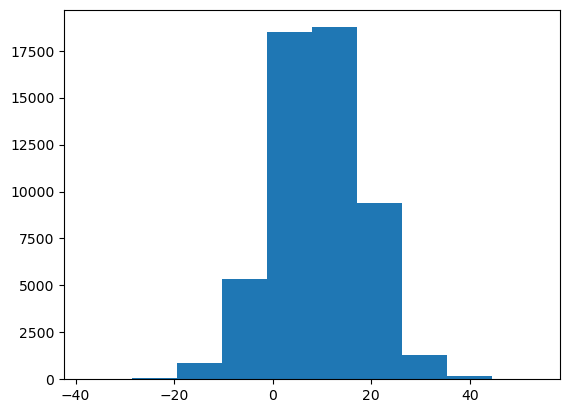

In [10]:
# visualizing the rotational angle of the head

head_roll = f['model_roll'][:]
print(np.nanmin(head_roll),np.nanmax(head_roll))

plt.hist(f['model_roll']


-73.21091713320263 63.38692925156473


(array([1.7000e+01, 3.5100e+02, 4.8550e+03, 1.7776e+04, 2.0911e+04,
        7.3440e+03, 2.3180e+03, 6.3800e+02, 1.0800e+02, 3.5000e+01]),
 array([-73.21091713, -59.55113249, -45.89134786, -32.23156322,
        -18.57177858,  -4.91199394,   8.7477907 ,  22.40757534,
         36.06735997,  49.72714461,  63.38692925]),
 <BarContainer object of 10 artists>)

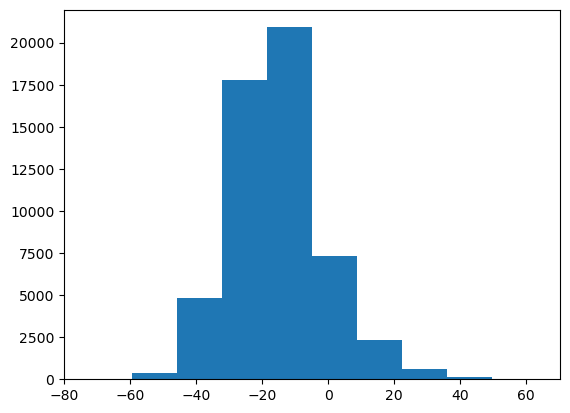

In [11]:
head_roll = f['model_pitch'][:]
print(np.nanmin(head_roll),np.nanmax(head_roll))

plt.hist(f['model_pitch'])